1.   [Construction d'un arbre simple](#1)
2.   [Classification des données Iris](#1)

#1. Construction d'un arbre simple
Dans cette partie nous allons utiliser la librairie [scikit-learn](https://scikit-learn.org/stable/)
Cette librairie est developpée essentiellement par le monde académique, l'inria. Elle est destinée à l'apprentissage automatique et est très fournie. Nous allons l'utiliser pour les arbres de décisions.

La méthode d'utilisation de sklearn est toujours la même :


*   On choisit la méthode (ici les arbres de décision : `tree`)
*   On fait tourner la méthode (`fit`)
*   On peut alors faire la prédiction (`predict`)






In [ ]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()

In [ ]:
X = [[0, 0], [1, 1]]
y = [0, 1]

In [ ]:
clf = clf.fit(X, y)

In [ ]:
clf.predict([[2., 2.]])

array([1])

In [ ]:
clf.predict_proba([[2., 2.]])

array([[0., 1.]])

#2 Classification des données Iris
Dans cet exemple nous allons travailler avec la base [iris](https://archive.ics.uci.edu/ml/datasets/Iris). C'est une basse classique, facilement accessible dans scikit learn. Elle permet la classification des iris en fonction de la longueur et largeur des pétales et des sépales

## Chargement des données et construction de l'arbre

On commence par charger le jeu de donnée [dataset iris](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html). On appelera X le vecteur correspondant au jeu de données et Y la cible

In [ ]:
from sklearn.datasets import load_iris

iris = load_iris()
X, y = iris.data, iris.target

On construit l'arbre de décision

In [ ]:
# A modifier


## Visualisation de l'arbre

A l'aide de la méthode `plot_tree`, visualiser l'arbre construit

In [ ]:
# A modifier


Utilisons la bibliiothèque `graphviz` pour visualiser de manière esthétique l'arbre.

In [ ]:
# A modifier
# Importer la bibliothèque graphiz

dot_data = tree.export_graphviz(clf, out_file=None,
                     feature_names=iris.feature_names,
                     class_names=iris.target_names,
                     filled=True, rounded=True,
                     special_characters=True)
graph = graphviz.Source(dot_data)
# Afficher le graph


L'arbre peut aussi être visualiser sous forme de texte en utlisant le fonction `export_text`

In [ ]:
# Importer export_text puis afficher l'arbre sous forme de texte


|--- petal width (cm) <= 0.80
|   |--- class: 0
|--- petal width (cm) >  0.80
|   |--- petal width (cm) <= 1.75
|   |   |--- petal length (cm) <= 4.95
|   |   |   |--- petal width (cm) <= 1.65
|   |   |   |   |--- class: 1
|   |   |   |--- petal width (cm) >  1.65
|   |   |   |   |--- class: 2
|   |   |--- petal length (cm) >  4.95
|   |   |   |--- petal width (cm) <= 1.55
|   |   |   |   |--- class: 2
|   |   |   |--- petal width (cm) >  1.55
|   |   |   |   |--- sepal length (cm) <= 6.95
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- sepal length (cm) >  6.95
|   |   |   |   |   |--- class: 2
|   |--- petal width (cm) >  1.75
|   |   |--- petal length (cm) <= 4.85
|   |   |   |--- sepal length (cm) <= 5.95
|   |   |   |   |--- class: 1
|   |   |   |--- sepal length (cm) >  5.95
|   |   |   |   |--- class: 2
|   |   |--- petal length (cm) >  4.85
|   |   |   |--- class: 2



On peut aussi visualiser les données par paires

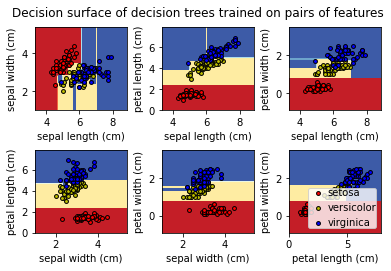

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

# Parameters
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02


for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target

    # Train
    clf = DecisionTreeClassifier().fit(X, y)

    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step)
    )
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(
            X[idx, 0],
            X[idx, 1],
            c=color,
            label=iris.target_names[i],
            cmap=plt.cm.RdYlBu,
            edgecolor="black",
            s=15,
        )

plt.suptitle("Decision surface of decision trees trained on pairs of features")
plt.legend(loc="lower right", borderpad=0, handletextpad=0)
_ = plt.axis("tight")

## Caractéristique de l'arbre

Calculer les statistiques (moyenne et écart-type) des quatre variables : longueur de sépale, largueur de sépale, longueur de pétale et largeur de pétale.

Pour cela, on utilisera la méthode `describe` de `scipy`

In [ ]:
#A compléter


Combien y a-t-il d’exemples de chaque classe ? On pourra utiliser la méthode  `bincount`

In [ ]:
np.bincount(iris.target)

## Construction et exploitation du modéle
Avant de construire le modèle, séparons le jeu de données en deux : 70% pour l’apprentissage, 30% pour le test.

In [ ]:
# A compléter


Nous pouvons désormais construire un arbre de décision sur ces données :

In [ ]:
# A compléter

Une fois l’apprentissage terminé, nous pouvons visualiser l’arbre, soit avec matplotlib en passant par la méthode `plot_tree`, soit avec l’outil `graphviz` (commande `dot`). Par exemple, avec matplotlib :

In [ ]:
tree.plot_tree(clf, filled=True)

## Prédiction

In [ ]:
# A compléter
# Faire la prediction sur l'echantillon de test

On peut de cette façon calculer le score en test :

Changez les valeurs de parametres max_depth et min_samples_leaf. Que constatez-vous ?

Le problème ici étant particulièrement simple, refaites une division apprentissage/test avec 5% des données en apprentissage et 95% test.

Calculez le taux d’éléments mal classifiés sur l’ensemble de test.

Faites varier (ou mieux, réalisez une recherche par grille avec `GridSearchCV`) les valeurs des paramètres `max_depth` et `min_samples_leaf` pour mesurer leur impact sur ce score.


Rque : En général on utilise une division apprentissage/test de type 80/20 ou 70/30 mais comme ici le problème d’apprentissage est particulièrement simple nous prenons seulement 5% de la base comme échantillon d’apprentissage (sinon, on risque de ne rien voir quand on modifie les paramètres).

In [ ]:
# A completer


## Arbres de décision pour la régression

On peut aussi traiter un problème de regression avec les arbres de décision. Scikit-learn offre la classe `DecisionTreeRegressor`. Comme pour la classification, la méthode `fit(...)` prend en entrée le paramètre X (attributs des observations). Attention : les `y` ne sont pas des étiquettes de classes mais des valeurs réelles.

Nous allons construire un signal sinusoïdal affecté par un bruit.

Text(0.5, 1.0, 'Signal sinusoïdal bruité')

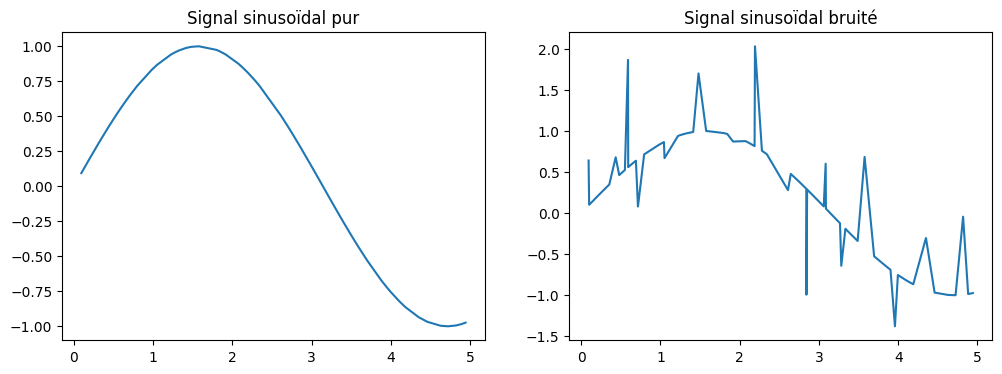

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeRegressor

# Créer les données d'apprentissage
np.random.seed(0)
X = np.sort(5 * np.random.rand(80, 1), axis=0)
y = np.sin(X).ravel()

fig = plt.figure(figsize=(12, 4))
fig.add_subplot(121)
plt.plot(X, y)
plt.title("Signal sinusoïdal pur")

# On ajoute un bruit aléatoire tous les 5 échantillons
y[::5] += 3 * (0.5 - np.random.rand(16))
fig.add_subplot(122)
plt.plot(X, y)
plt.title("Signal sinusoïdal bruité")

Nous allons maintenant construire un arbre de regression en utilisant le méthode `DecisionTreeRegressor` de scikit-learn.

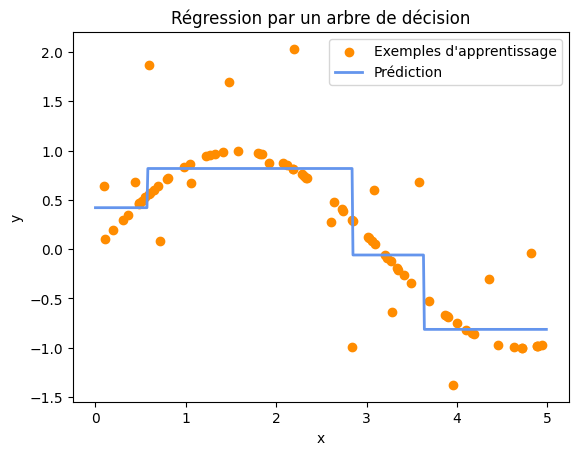

In [ ]:
# Apprendre le modèle
# Completer

# Prédiction sur la même plage de valeurs
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_pred = reg.predict(X_test)

# Affichage des résultats
plt.figure()
plt.scatter(X, y, c="darkorange", label="Exemples d'apprentissage")
plt.plot(X_test, y_pred, color="cornflowerblue", label="Prédiction", linewidth=2)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Régression par un arbre de décision")
plt.legend()
plt.show()

## <font color='violet'>Question</font>

Changer la valeur du parametre `max_depth`. Que se passe-t-il si on prend une valeur trop grande ? Trop petite ? Changer le taux d’éléménts affectés par le bruit (le `y[::5]`). Quand tous les éléments sont affectés par le bruit, faut-il préférer une valeur élevée ou faible pour `max_depth` ?

## Base de données `diabetes`

Chargez la base de données `diabetes`  du module `sklearn.datasets`([lien](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html)) et faire une  partition aléatoire en partie apprentissage et partie test (70% apprentissage, 30% test). Construire un modèle d’arbre de regression sur cette base. Calculer l’erreur quadratique moyenne sur l’ensemble de test.